In [1]:
import numpy as np
from queue import PriorityQueue
from astar_utils import get_neighbor_nodes, exceed_board, reconstruct_path
from astar_utils import load_board, plot_board, create_video_from_frames

define heuristic function $h(n)$ as a Manhattan distance between two points.

In [2]:
def heuristic_func(xy0, xy1):
    h = abs(xy0[0] - xy1[0]) + abs(xy0[1] - xy1[1])
    return h

In [3]:
DIRECTION_MOVES = [(0,1), (0,-1), (-1,0), (1, 0)] # down, up, left, right

# Load the maze.

this section load and define the starting and target node.

the next section we will run a comparision between 3 strategies and create a animation <br>
the animation may not work if your device do not support the codec. 

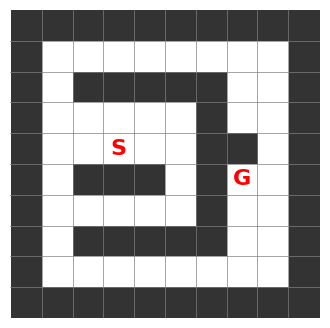

In [9]:
board = load_board('maze/1.png')
XY_WALLS = tuple(zip(*np.where(board==np.inf))) # walls
XY_STARTING = (4, 3)  # starting node
XY_TARGET = (5, 7)  # target node

plot_board(board, None, XY_STARTING, XY_TARGET)

## Figure 3a: using only actual cost.

In [10]:
frames = [] # to create an animation.

G = board.copy() # table storing actual cost g(n)
F = board.copy() # table storing f(n) = g(n) + h(n)
G[XY_STARTING] = 0
F[XY_STARTING] = G[XY_STARTING] + 0
bestPath = None

current_node = XY_STARTING
frontier = PriorityQueue()
frontier.put((F[XY_STARTING], XY_STARTING))
explored_set = set()
came_from = {}
while not frontier.empty():    
    # comment this out if do not want to create a video.
    frame = plot_board(F, current_node, XY_STARTING, XY_TARGET, frontier, came_from, None, return_frame=True)
    frames.append(frame)
    
    cost, current_node = frontier.get() # get the node with lowest f(n) and remove it from the queue.
    explored_set.add(current_node)
    
    if current_node == XY_TARGET:
        bestPath = reconstruct_path(came_from, XY_STARTING, XY_TARGET)
        frame = plot_board(F, current_node, XY_STARTING, XY_TARGET, frontier, came_from, bestPath, return_frame=True)
        frames.append(frame)
        break
    child_nodes = get_neighbor_nodes(current_node, DIRECTION_MOVES)
    for child in child_nodes:
        if exceed_board(child, board.shape) or (child in XY_WALLS) or (child in explored_set):
            continue
        G[child] = G[current_node] + 1 # cost 1 point per move.
        h = 0
        f = G[child] + h
        if f < F[child]:
            F[child] = f
            frontier.put((f, child))
            came_from[child] = current_node

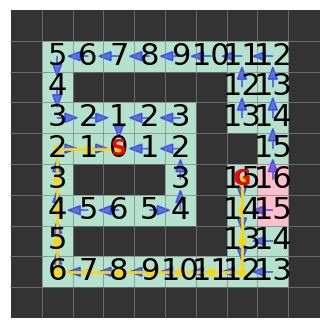

In [11]:
plot_board(F, current_node, XY_STARTING, XY_TARGET, frontier, came_from, bestPath)

In [12]:
video = create_video_from_frames(frames, 'maze1_actual_cost_only.mp4', fps=2)
video

## Figure 3b: using only heuristic cost.

In [13]:
frames = [] # to create an animation.

G = board.copy() # table storing actual cost g(n)
F = board.copy() # table storing f(n) = g(n) + h(n)
G[XY_STARTING] = 0
F[XY_STARTING] = 0 + heuristic_func(XY_STARTING, XY_TARGET)
bestPath = None

current_node = XY_STARTING
frontier = PriorityQueue()
frontier.put((F[XY_STARTING], XY_STARTING))
explored_set = set()
came_from = {}
while not frontier.empty():    
    # comment this out if do not want to create a video.
    frame = plot_board(F, current_node, XY_STARTING, XY_TARGET, frontier, came_from, None, return_frame=True)
    frames.append(frame)
    
    cost, current_node = frontier.get() # get the node with lowest f(n) and remove it from the queue.
    explored_set.add(current_node)
    
    if current_node == XY_TARGET:
        bestPath = reconstruct_path(came_from, XY_STARTING, XY_TARGET)
        frame = plot_board(F, current_node, XY_STARTING, XY_TARGET, frontier, came_from, bestPath, return_frame=True)
        frames.append(frame)
        break
    child_nodes = get_neighbor_nodes(current_node, DIRECTION_MOVES)
    for child in child_nodes:
        if exceed_board(child, board.shape) or (child in XY_WALLS) or (child in explored_set):
            continue
        G[child] = G[current_node] + 0 # cost 1 point per move.
        h = heuristic_func(child, XY_TARGET)
        f = G[child] + h
        if f < F[child]:
            F[child] = f
            frontier.put((f, child))
            came_from[child] = current_node

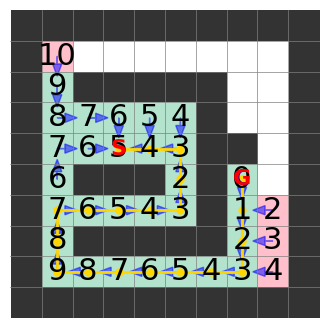

In [14]:
plot_board(F, current_node, XY_STARTING, XY_TARGET, frontier, came_from, bestPath)

In [15]:
video = create_video_from_frames(frames, 'maze1_heuristic_cost_only.mp4', fps=2)
video

## Figure 3c: using both cost.

In [16]:
frames = [] # to create an animation.

G = board.copy() # table storing actual cost g(n)
F = board.copy() # table storing f(n) = g(n) + h(n)
G[XY_STARTING] = 0
F[XY_STARTING] = G[XY_STARTING] + heuristic_func(XY_STARTING, XY_TARGET)
bestPath = None

current_node = XY_STARTING
frontier = PriorityQueue()
frontier.put((F[XY_STARTING], XY_STARTING))
explored_set = set()
came_from = {}
while not frontier.empty():    
    # comment this out if do not want to create a video.
    frame = plot_board(F, current_node, XY_STARTING, XY_TARGET, frontier, came_from, None, return_frame=True)
    frames.append(frame)
    
    cost, current_node = frontier.get() # get the node with lowest f(n) and remove it from the queue.
    explored_set.add(current_node)
    
    if current_node == XY_TARGET:
        bestPath = reconstruct_path(came_from, XY_STARTING, XY_TARGET)
        frame = plot_board(F, current_node, XY_STARTING, XY_TARGET, frontier, came_from, bestPath, return_frame=True)
        frames.append(frame)
        break
    child_nodes = get_neighbor_nodes(current_node, DIRECTION_MOVES)
    for child in child_nodes:
        if exceed_board(child, board.shape) or (child in XY_WALLS) or (child in explored_set):
            continue
        G[child] = G[current_node] + 1 # cost 1 point per move.
        h = 1.1*heuristic_func(child, XY_TARGET)
        f = G[child] + h
        if f < F[child]:
            F[child] = f
            frontier.put((f, child))
            came_from[child] = current_node

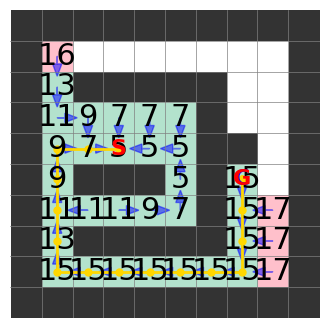

In [17]:
plot_board(F, current_node, XY_STARTING, XY_TARGET, frontier, came_from, bestPath)

In [18]:
video = create_video_from_frames(frames, 'maze1_both_cost.mp4', fps=2)
video